# Text Analysis and NLP fundamentals

### Regular Expressions
    - pythons in-build re module

### CSV files
    - working with csv files using pandas

### Text preprocessing
    - removal of unwanted characters
    - text normalisation
    - tokenisation
    - stopword removal
    - lemmatising and stemming
    
    
### Bag-of-Words model
    - one-hot-encoded vectors
    - limitations


NLP & ML libraries:
- NLTK: https://www.nltk.org/
- spacy: https://spacy.io/
- scikit-learn: https://scikit-learn.org/represented

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Regular Expressions

A regular expression (shortened as regex or regexp)is a sequence of characters that specifies a search pattern in text. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

You can try out all the examples given below here: https://www.w3schools.com/python/python_regex.asp

The re module offers a set of functions that allows us to search a string for a match:

| Function     | Description              |
|--------------|--------------------------|
| findall      | Returns a list containing all matches  | 
| search       |  	Returns a Match object if there is a match anywhere in the string       |
| split         | Returns a list where the string has been split at each match  |
| sub    | Replaces one or many matches with a string          | 
| finditer  | Returns an iterator yielding MatchObject instances over all non-overlapping matches for the RE pattern in string  |  


### Metacharacters
Metacharacters are characters with a special meaning:

| Character     | Description              |   Example                       |
|--------------|--------------------------|--------------------------|
|  []     | A set of characters  | "[a-m]"  | 
|  \      | Signals a special sequence (can also be used to escape special characters)   |  "\d"   |
|  .   | Any character (except newline character) | "he..o" | 
|  ^   |  Starts with   |  "^hello"  | 
|  $   |   	Ends with   | "planet\$"   | 
|  *   |  Zero or more occurrences   | 	"he.*o"  | 
|  +   |   	One or more occurrences   |   	"he.+o"  | 
|  ?   |  Zero or one occurrences   |  	"he.?o"   | 
|  {}   | Exactly the specified number of occurrences    |   	"he.{2}o"  | 
|  \|  |    	Either or  |  "falls|stays"  | 
|  ()   | Capture and group    | a(bc)+   | 

### Special Sequences

A special sequence is a \ followed by one of the characters in the list below, and has a special meaning:

| Function     | Description              |  Example                 |
|--------------|--------------------------|--------------------------|
|  \A     |   	Returns a match if the specified characters are at the beginning of the string |  	"\AThe"  | 
|  \b      |  Returns a match where the specified characters are at the beginning or at the end of a word* |  r"\bain"  |
|  \B   | Returns a match where the specified characters are present, but NOT at the beginning (or at the end) of a word  | r"\Bain" | 
|  \d  |  Returns a match where the string contains digits (numbers from 0-9)   | "\d"   | 
|  \D   | Returns a match where the string DOES NOT contain digits | "\D" | 
|  \s   |   	Returns a match where the string contains a white space character   | "\s"   | 
|  \S   |  	Returns a match where the string DOES NOT contain a white space character | "\S" | 
|  \w   | Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)    |  "\w"  | 
|  \W   |  	Returns a match where the string DOES NOT contain any word characters    | "\W"   |
|  \Z   |  	Returns a match if the specified characters are at the end of the string    | "Spain\Z"   |

*(the "r" in the beginning is making sure that the string is being treated as a "raw string") 

### Sets

A set is a set of characters inside a pair of square brackets [] with a special meaning:

| Set    | Description              | 
|--------------|--------------------------|
|   [arn]      |   	Returns a match where one of the specified characters (a, r, or n) are present              | 
|   [a-n]           |  	Returns a match for any lower case character, alphabetically between a and n              | 
|   [^arn]           |  	Returns a match for any character EXCEPT a, r, and n              | 
|   [0123]           | Returns a match where any of the specified digits (0, 1, 2, or 3) are present              | 
|   [0-9]           |   	Returns a match for any digit between 0 and 9             | 
|   [0-5][0-9]           |     	Returns a match for any two-digit numbers from 00 and 59           | 
|   [a-zA-Z]           |   	Returns a match for any character alphabetically between a and z, lower case OR upper case             | 
| [Cc]at 	 | Returns `Cat` or `cat`  | 
|     [+]         |  In sets, +, *, ., \|, (), \$,\{\} has no special meaning, so \[+\] means: return a match for any + character in the string             | 

### Examples

In [2]:
import re

#finding all instances
txt = "The UK has left the EU. The EU now only has 27 member states."
x = re.findall(r"EU|UK", txt)
print(x) 

['UK', 'EU', 'EU']


In [3]:
# getting the indices
x = re.search("EU", txt) #only finds first occurance
x

<re.Match object; span=(20, 22), match='EU'>

In [4]:
x.span()

(20, 22)

In [5]:
txt[20:22]

'EU'

In [7]:
#finding all indices with re.finditer
[(m.start(0), m.end(0)) for m in re.finditer("EU", txt)]

[(20, 22), (28, 30)]

In [8]:
#need to specify word boundaries to avoid also matching EU in EUROZONE
txt = "The UK has left the EU. The EU now only has 27 member states. The UK had never been in the EUROZONE."
x = re.findall(r"\bEU\b|\bUK\b", txt)
print(x)

['UK', 'EU', 'EU', 'UK']


In [9]:
#splitting
x = re.split("\.", txt)   #dont forget that we need to escape "."
print(x)

['The UK has left the EU', ' The EU now only has 27 member states', ' The UK had never been in the EUROZONE', '']


In [10]:
#substitution
x = re.sub("UK", "United Kingdom", txt)
print(x) 

The United Kingdom has left the EU. The EU now only has 27 member states. The United Kingdom had never been in the EUROZONE.


## Pandas

For handling large or multi-column CSV data sets there is a nice Python module called pandas. It is a module for conveniently managing big data with multiple features (check the official module documentation at https://pandas.pydata.org/docs/).

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("dummy_data.csv")

In [13]:
df

,type,text,tag
0,sms,"Wa, ur openin sentence very formal... Anyway, ...",ham
1,sms,"As I entered my cabin my PA said, '' Happy B'd...",ham
2,sms,here is my new address -apples&pairs&all that ...,ham
3,sms,Goodo! Yes we must speak friday - egg-potato r...,ham
4,sms,Hmm...my uncle just informed me that he's payi...,ham
5,sms,PRIVATE! Your 2004 Account Statement for 07742...,spam
6,sms,URGENT! Your Mobile No. was awarded σú2000 Bon...,spam
7,sms,GENT! We are trying to contact you. Last weeke...,spam
8,sms,You are a winner U have been specially selecte...,spam
9,sms,Todays Voda numbers ending 7548 are selected t...,spam


As you can see pandas creates a table containing columns and rows. This table object is called DataFrame and it consists of columns called Series. Every entry is presented as a row.

If you deal with a very large data set you probably don't want to print all entries, you rather want to check if the file loaded properly. To do so, you can apply the .head() method on the newly created DataFrame object.

If you are not familiar with `pandas`, you can treat it as a more powerful MS Excel, since you can manipulate or process all the data using Python. Let's say you want to see all `text` fields of entries being classified as the `sms`. Additionally, you want these text fields formatted in lower case.

In [14]:
sms_df = df[df['type'] == 'sms']

In [15]:
sms_df

,type,text,tag
0,sms,"Wa, ur openin sentence very formal... Anyway, ...",ham
1,sms,"As I entered my cabin my PA said, '' Happy B'd...",ham
2,sms,here is my new address -apples&pairs&all that ...,ham
3,sms,Goodo! Yes we must speak friday - egg-potato r...,ham
4,sms,Hmm...my uncle just informed me that he's payi...,ham
5,sms,PRIVATE! Your 2004 Account Statement for 07742...,spam
6,sms,URGENT! Your Mobile No. was awarded σú2000 Bon...,spam
7,sms,GENT! We are trying to contact you. Last weeke...,spam
8,sms,You are a winner U have been specially selecte...,spam
9,sms,Todays Voda numbers ending 7548 are selected t...,spam


In [16]:
sms_df["text"] = sms_df['text'].str.lower()  # Equivalent to sms_df.text.str.lower()
sms_df

,type,text,tag
0,sms,"wa, ur openin sentence very formal... anyway, ...",ham
1,sms,"as i entered my cabin my pa said, '' happy b'd...",ham
2,sms,here is my new address -apples&pairs&all that ...,ham
3,sms,goodo! yes we must speak friday - egg-potato r...,ham
4,sms,hmm...my uncle just informed me that he's payi...,ham
5,sms,private! your 2004 account statement for 07742...,spam
6,sms,urgent! your mobile no. was awarded σú2000 bon...,spam
7,sms,gent! we are trying to contact you. last weeke...,spam
8,sms,you are a winner u have been specially selecte...,spam
9,sms,todays voda numbers ending 7548 are selected t...,spam


We can see that the text is missing in one of the rows. So this row is no use for us. Let's drop it

In [17]:
sms_df.dropna(inplace=True)

In [18]:
#sms_df = sms_df.dropna()

In [19]:
sms_df

,type,text,tag
0,sms,"wa, ur openin sentence very formal... anyway, ...",ham
1,sms,"as i entered my cabin my pa said, '' happy b'd...",ham
2,sms,here is my new address -apples&pairs&all that ...,ham
3,sms,goodo! yes we must speak friday - egg-potato r...,ham
4,sms,hmm...my uncle just informed me that he's payi...,ham
5,sms,private! your 2004 account statement for 07742...,spam
6,sms,urgent! your mobile no. was awarded σú2000 bon...,spam
7,sms,gent! we are trying to contact you. last weeke...,spam
8,sms,you are a winner u have been specially selecte...,spam
9,sms,todays voda numbers ending 7548 are selected t...,spam


Now, let's try to add a new column containing the length of the messages in the `sms_df`.

In [20]:
# This line (creates) a new column and fills it with a length (.str.len()) of every message. 
sms_df['text_length'] = sms_df.text.str.len()
sms_df

,type,text,tag,text_length
0,sms,"wa, ur openin sentence very formal... anyway, ...",ham,143
1,sms,"as i entered my cabin my pa said, '' happy b'd...",ham,156
2,sms,here is my new address -apples&pairs&all that ...,ham,53
3,sms,goodo! yes we must speak friday - egg-potato r...,ham,72
4,sms,hmm...my uncle just informed me that he's payi...,ham,86
5,sms,private! your 2004 account statement for 07742...,spam,144
6,sms,urgent! your mobile no. was awarded σú2000 bon...,spam,157
7,sms,gent! we are trying to contact you. last weeke...,spam,159
8,sms,you are a winner u have been specially selecte...,spam,153
9,sms,todays voda numbers ending 7548 are selected t...,spam,156


You can see that the data is not shuffled - this can be problematic later, so let's shuffle it. The idiomatic way to do this with Pandas is to use the .sample method of your data frame to sample all rows without replacement. The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means to return all rows (in random order).

In [21]:
sms_df = sms_df.sample(frac=1)

In [22]:
sms_df

,type,text,tag,text_length
6,sms,urgent! your mobile no. was awarded σú2000 bon...,spam,157
0,sms,"wa, ur openin sentence very formal... anyway, ...",ham,143
7,sms,gent! we are trying to contact you. last weeke...,spam,159
1,sms,"as i entered my cabin my pa said, '' happy b'd...",ham,156
3,sms,goodo! yes we must speak friday - egg-potato r...,ham,72
8,sms,you are a winner u have been specially selecte...,spam,153
2,sms,here is my new address -apples&pairs&all that ...,ham,53
5,sms,private! your 2004 account statement for 07742...,spam,144
4,sms,hmm...my uncle just informed me that he's payi...,ham,86
9,sms,todays voda numbers ending 7548 are selected t...,spam,156


In [23]:
#If you wish to reset the index, you could do e.g.
sms_df = sms_df.sample(frac=1).reset_index(drop=True)

In [24]:
sms_df

,type,text,tag,text_length
0,sms,hmm...my uncle just informed me that he's payi...,ham,86
1,sms,todays voda numbers ending 7548 are selected t...,spam,156
2,sms,private! your 2004 account statement for 07742...,spam,144
3,sms,you are a winner u have been specially selecte...,spam,153
4,sms,"as i entered my cabin my pa said, '' happy b'd...",ham,156
5,sms,goodo! yes we must speak friday - egg-potato r...,ham,72
6,sms,here is my new address -apples&pairs&all that ...,ham,53
7,sms,"wa, ur openin sentence very formal... anyway, ...",ham,143
8,sms,gent! we are trying to contact you. last weeke...,spam,159
9,sms,urgent! your mobile no. was awarded σú2000 bon...,spam,157


In [25]:
# Sorting based on text_length
sms_df.sort_values('text_length', ascending=False)

,type,text,tag,text_length
8,sms,gent! we are trying to contact you. last weeke...,spam,159
9,sms,urgent! your mobile no. was awarded σú2000 bon...,spam,157
1,sms,todays voda numbers ending 7548 are selected t...,spam,156
4,sms,"as i entered my cabin my pa said, '' happy b'd...",ham,156
3,sms,you are a winner u have been specially selecte...,spam,153
2,sms,private! your 2004 account statement for 07742...,spam,144
7,sms,"wa, ur openin sentence very formal... anyway, ...",ham,143
0,sms,hmm...my uncle just informed me that he's payi...,ham,86
5,sms,goodo! yes we must speak friday - egg-potato r...,ham,72
6,sms,here is my new address -apples&pairs&all that ...,ham,53


In [26]:
length_series = sms_df.text_length.tolist()

In [27]:
length_series

[86, 156, 144, 153, 156, 72, 53, 143, 159, 157]

In [28]:
sms_df = sms_df.drop("text_length", axis=1) #0 is for lines

In [29]:
sms_df

,type,text,tag
0,sms,hmm...my uncle just informed me that he's payi...,ham
1,sms,todays voda numbers ending 7548 are selected t...,spam
2,sms,private! your 2004 account statement for 07742...,spam
3,sms,you are a winner u have been specially selecte...,spam
4,sms,"as i entered my cabin my pa said, '' happy b'd...",ham
5,sms,goodo! yes we must speak friday - egg-potato r...,ham
6,sms,here is my new address -apples&pairs&all that ...,ham
7,sms,"wa, ur openin sentence very formal... anyway, ...",ham
8,sms,gent! we are trying to contact you. last weeke...,spam
9,sms,urgent! your mobile no. was awarded σú2000 bon...,spam


In [30]:
sms_df.head(10)

,type,text,tag
0,sms,hmm...my uncle just informed me that he's payi...,ham
1,sms,todays voda numbers ending 7548 are selected t...,spam
2,sms,private! your 2004 account statement for 07742...,spam
3,sms,you are a winner u have been specially selecte...,spam
4,sms,"as i entered my cabin my pa said, '' happy b'd...",ham
5,sms,goodo! yes we must speak friday - egg-potato r...,ham
6,sms,here is my new address -apples&pairs&all that ...,ham
7,sms,"wa, ur openin sentence very formal... anyway, ...",ham
8,sms,gent! we are trying to contact you. last weeke...,spam
9,sms,urgent! your mobile no. was awarded σú2000 bon...,spam


In [31]:
#other useful functions

sms_df.tag.unique()

array(['ham', 'spam'], dtype=object)

In [32]:
sms_df.tag.value_counts()

ham     5
spam    5
Name: tag, dtype: int64

<Axes: >

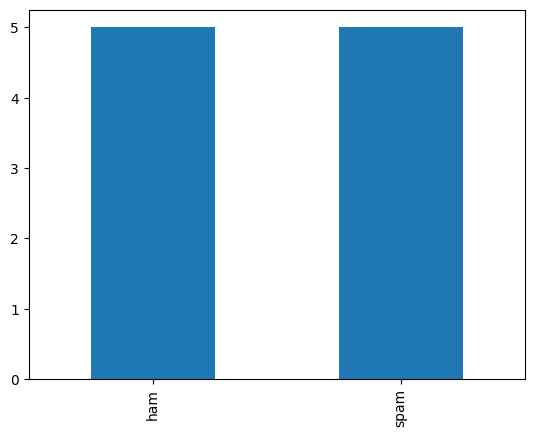

In [33]:
sms_df.tag.value_counts().plot.bar()

## Text Preprocessing


### Removal of unwanted characters

The is a primary step in the process of text cleaning. If we scrap some text from HTML/XML sources, we’ll need to get rid of all the tags, HTML entities, punctuation, non-alphabets, and any other kind of characters that might not be a part of the language. The general methods of such cleaning involve **regular expressions**, which can be used to filter out most of the unwanted texts.

However, sometimes, depending on the type of data, we want to retain certain types of punctuation. Consider for example human-generated tweets which you want to classify as very angry, angry, neutral, happy, and very happy. Simple sentiment analysis might find it hard to differentiate between a happy, and very happy sentiment because the only difference between a happy and a very happy tweet might be punctuation.

Example:

*`This is amazing`* vs *`THIS IS AMAZING!!!!!`*

Or what about this one

*`I don't know :) <3`* vs *`I don't know :(((`*

Now let's create a simple function that keeps only letters.

In [34]:
def keep_letters_only(raw_text):
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    return letters_only_text

In [35]:
sms_sample = """***** CONGRATlations **** You won 2 tIckETs to Hamilton in 
NYC http://www.hamiltonbroadway.com/J?NaIOl/event   wORtH over $500.00...CALL 
555-477-8914 or send message to: hamilton@freetix.com to get tickets !!!"""

review_sample = """ THIS FOOD AND STAFF WAS AMAZING!!!!! ABSOLUTELY LOVE THAT PLACE <3<3<3"""

news_sample = """worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (┬ú5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud  arguing that auditors did not alert him to any problems.  ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief  giving only  brief  answers himself. the prosecution s star witness  former worldcom financial chief scott sullivan  has said that mr ebbers ordered accounting adjustments at the firm  telling him to  hit our books . however  ms cooper said mr sullivan had not mentioned  anything uncomfortable  about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. last week  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn."""

In [36]:
keep_letters_only(sms_sample)

'      CONGRATlations      You won   tIckETs to Hamilton in  NYC http   www hamiltonbroadway com J NaIOl event   wORtH over           CALL               or send message to  hamilton freetix com to get tickets    '

You can see that this is not ideal as this leaves us with a lot of random stuff like "www" and "com". We will get back to that later.

In [37]:
keep_letters_only(review_sample) 

' THIS FOOD AND STAFF WAS AMAZING      ABSOLUTELY LOVE THAT PLACE       '

We don't lose any meaning, but as mentioned previously, keeping the exclamation marks might be useful if we want to distinguish between positive and VERY positive reviews.

In [38]:
keep_letters_only(news_sample)

'worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness   cynthia cooper  worldcom s ex head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in       her warnings led to the collapse of the firm following the discovery of an    bn       bn  accounting fraud  mr ebbers has pleaded not guilty to charges of fraud and conspiracy   prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates  but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early      and       she said andersen had given a  green light  to the procedures and practices used by worldcom  mr eb

For news articles that works perfectly fine as we do not lose any relevant information in this case since we want to classify by genre (sports, business, tech, etc.).


### Text Normalisation

Recall our sms sample:

`**** CONGRATlations **** You won 2 tIckETs to Hamilton in NYC http://www.hamiltonbroadway.com/J?NaIOl/event wORtH over $500.00...CALL 555-477-8914 or send message to: hamilton@freetix.com to get the tickets !!`

No doubt that this as spam. But clearly, there's a lot going on here: phone numbers, emails, website URLs, money amounts, and gratuitous whitespace and punctuation. Some terms are randomly capitalized, others are in all-caps. Since these terms might show up in any one of the training examples in countless forms, we need a way to ensure each training example is on an equal footing via a preprocessing step called **normalisation**. 

To detect spam messages we don't want the computer to know or remember which email address or phone number was previously used in a spam message. We want the computer to understand **the pattern** of a spammy message. For example, if the message contains a lot of money amounts, words like "congratulations", "you won", AND an email address, it should be more likely to be considered spam. Again, we do not care what was the particular email address.'

So instead of removing the following terms, for each training example, let's replace them with a specific string.

- Replace email addresses with `emailaddr`
- Replace URLs with `httpaddr`
- Replace money symbols with `moneysymb`
- Replace phone numbers with `phonenumbr`
- Replace numbers with `numbr`
- get rid of all other punctuations


In [39]:
def normalisation_sms(raw_text):
    cleaned = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', raw_text)
    cleaned = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     cleaned)
    cleaned = re.sub(r'£|\$|\€', 'moneysymb ', cleaned) #add whitespace
    cleaned = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', cleaned)
    cleaned = re.sub(r'\d+(\.\d+)?', 'numbr', cleaned)
    letters_only_text = re.sub("[^a-zA-Z]", " ", cleaned)
    return letters_only_text

In [40]:
normalisation_sms(sms_sample)

'      CONGRATlations      You won numbr tIckETs to Hamilton in  NYC httpaddr   wORtH over moneysymb numbr   CALL  phonenumbr or send message to  emailaddr to get tickets    '

### Tokenisation

Tokenisation is the process of splitting a sentence into words (tokens).

As you remember, in the previous notebook we used the .split() method which may be helpful in this case. Let's see an easy example:

In [41]:
print("A bad day in London is still better than a bad day anywhere else. test".split())

['A', 'bad', 'day', 'in', 'London', 'is', 'still', 'better', 'than', 'a', 'bad', 'day', 'anywhere', 'else.', 'test']


You can see that the full stop at the end of the sentence was left with the word "else". Of course, people are smart enough to understand that both tokens have the same meaning. However, computer algorithms looking for patterns will treat "else" and "else." like different tokens.

One could use regular expressions and try to write a function that splits the sentence above in the correct way (keep in mind that there are words where the fullstop (or other punctuations) belong to the word, like "Mr." and "o'clock"). But this would be tedious and error-prone. Good there are libraries that alredy do the job for us.

In [8]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/lisawork/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lisawork/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lisawork/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/lisawork/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
from nltk.tokenize import word_tokenize

print(word_tokenize("I don't like stormy weather after 8 o'clock in the evening!"))

['I', 'do', "n't", 'like', 'stormy', 'weather', 'after', '8', "o'clock", 'in', 'the', 'evening', '!']


In [44]:
"I don't like stormy weather after 8 o'clock in the evening!".split()

['I',
 "don't",
 'like',
 'stormy',
 'weather',
 'after',
 '8',
 "o'clock",
 'in',
 'the',
 'evening!']

As you can see `word_tokenizer` does exactly what we want! Nltk provides also different tokenizers for different types of input. Let's compare the `word_tokenize` with `TweetTokenizer`, which has been designed to work better with Twitter-type source texts (including hashtags, mentions, etc.).

In [10]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()

print(word_tokenize("Hey @everyone, this is a sample #Twitter text containing some emojis :))) !!! Have fun <3 !"))
print()
print(tt.tokenize("Hey @everyone, this is a sample #Twitter text containing some emojis :))) !!! Have fun <3 !"))

['Hey', '@', 'everyone', ',', 'this', 'is', 'a', 'sample', '#', 'Twitter', 'text', 'containing', 'some', 'emojis', ':', ')', ')', ')', '!', '!', '!', 'Have', 'fun', '<', '3', '!']

['Hey', '@everyone', ',', 'this', 'is', 'a', 'sample', '#Twitter', 'text', 'containing', 'some', 'emojis', ':)', ')', ')', '!', '!', '!', 'Have', 'fun', '<3', '!']


In [46]:
from nltk.tokenize import word_tokenize,sent_tokenize


### Stopword removal

Stopwords are the words that are used very frequently. Words like “of, are, the, it, is” are some examples of stopwords. In applications like document search engines and document classification, where keywords are more important than general terms, removing stopwords can be a good idea. However, when searching for song lyrics or quores, stopwords can be important. 

“To be, or not to be” - Stopwords in such phrases actually play an important role, and hence, should not be dropped.

Another example is negation. "not" is contained in many stopword lists, but deleting "not" out of a negative review can make a positive out of it.

There are two common approaches to removing the stopwords, and both are fairly straightforward. One way is to count all the word occurrences, and providing a threshold value on the count, and getting rid of all the terms/words occurring more than the specified threshold value. The other way is to have a predetermined list of stopwords, which can be removed from the list of tokens/tokenized sentences. In the beginning, the second one may be better, as determining thresholds can be quite difficult.

NLTK comes with many corpora, including a stopword list. This list contains around 200 terms. However, you may want to use one that contains almost 600 terms: [http://www.ai.mit.edu/projects/jmlr/papers/volume5/lewis04a/a11-smart-stop-list/english.stop](http://www.ai.mit.edu/projects/jmlr/papers/volume5/lewis04a/a11-smart-stop-list/english.stop) (That is the one we were using in the previous notebooks, just with the apostrophes removed)

In [47]:
stop_words = []

with open("stopword_file.txt", 'r') as f:
    stop_words.extend(f.read().splitlines())


print(stop_words[:10])  # First 10 stopwords

['a', 'as', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after']


In [48]:
len(stop_words)

571

In [11]:
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('english'))
len(stop_words_nltk)

179

### Lemmatising and Stemming

Lemmatisation and stemming both refer to a process of reducing a word to its root. The difference is that stem might not be an actual word whereas, a lemma is an actual word. It’s a handy tool if you want to avoid treating different forms of the same word as different words, e.g. *love, loved, loving*

**Lemmatising:** considered, considers, consider → “consider”

**Stemming:** considered, considering, consider → “consid”

In many applications, there may be no significant difference between lemmatising and stemming when training classifiers. However, the best way to find out how they work and when to use which solution is to try them! NLTK comes with many different in-built lemmatisers and stemmers, so just plug and play.

A note of caution: WordNetLemmatizer requires a POS-tag. The default is set to "noun" and therefore doesn't work with other words.

In [12]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

verb = "considers"
noun = "apples"

stemmed_verb =  stemmer.stem(verb)
lemmatised_verb = lemmatizer.lemmatize(verb) #, "v") 

stemmed_noun =  stemmer.stem(noun)
lemmatised_noun = lemmatizer.lemmatize(noun)

print(stemmed_verb)
print(lemmatised_verb)

consid
considers


In [65]:
print(stemmed_noun)
print(lemmatised_noun)

appl
apple


In [55]:
#better to use spacy for lemmatising
import spacy

load_model = spacy.load('en_core_web_sm', disable = ['parser','ner'])

My_text = "some words including apples and considers"

doc = load_model(My_text)

" ".join([token.lemma_ for token in doc])

'some word include apple and consider'

## Bag-of-Words model

Ok, now that we know how to preprocess and tokenise our text, it is time to convert it into computer-readable vectors. This is called feature extraction. The **bag-of-words (BOW) model** is a popular and simple feature extraction technique. The intuition behind BOW is that two sentences are said to be similar if they contain a similar set of words.

The general idea of the BOW model is to count how many times each word (*token*) from the dataset occurs in a given sentence/source. The simplest way of implementing this model is using Python dictionaries. Let's try!

In [25]:
sentence1 = "They like apples"
sentence2 = "We like bananas"

sentence1_bag = {}
sentence2_bag = {}

def create_bag(text):
    bag = {}
    for token in text.split():
        if token in bag:
            bag[token] += 1
        else:
            bag[token] = 1
    return bag

sentence1_bag = create_bag(sentence1)
sentence2_bag = create_bag(sentence2)
print(sentence1_bag)
print(sentence2_bag)

{'They': 1, 'like': 1, 'apples': 1}
{'We': 1, 'like': 1, 'bananas': 1}


Ok, now the computer understands how many and which words make up each sentence but is it able to compare them? No, because there isn't any connection between those sentences (yet!). We have to develop a "common denominator" for both sentences so we can compare them. 

### One-Hot Vectors
In the case of the BOW model, the solution is to create a *bag* of all used tokens and encode words using computer-readable **One-Hot Vectors**. How does it work? BOW constructs a dictionary of *m* unique words in the corpus (vocabulary) and converts each word into a sparse vector of size *m*, where all values are set to 0 apart from the index of that word in the vocabulary. We can also say that each word is a feature and that sentences consist of features. 

In the case above there are five different words: "They", "We", "like", "apples", "bananas". We can encode them using a vector of length 5.

| word    | associated vector |
|---------|-------------------|
| They    | [1,0,0,0,0]       |
| We      | [0,1,0,0,0]       |
| like    | [0,0,1,0,0]       |
| apples  | [0,0,0,1,0]       |
| bananas | [0,0,0,0,1]       |


A sentence can be represented by adding the vectors together.

For example: *They like apples* can be expressed as *They + like + apples* and using vectors: [1,0,0,0,0] + [0,0,1,0,0] + [0,0,0,1,0] = [1,0,1,1,0], hence the computer readable version of "They like apples" is [1,0,1,1,0]. 

| sentence           | associated sum of vectors |
|--------------------|---------------------------|
| They like apples   | [1,0,1,1,0]               |
| We like apples     | [0,1,1,1,0]               |
| We like bananas    | [0,1,1,0,1]               |
| apples like They   | [1,0,1,1,0]               |

What if there are more than 1 occurrence of the same token? There are different ways of handling that: max-pooling only counts whether a word is present, but not how many times. Sum pooling counts the number of occurrences of each word.

| sentence                     | method            | associated sum of vectors |
|------------------------------|-------------------|---------------------------|
| They like like like apples   | max-pooling       |[1,0,1,1,0]                |
| They like like like apples   | sum pooling       |[1,0,3,1,0]                |



Now, how to implement it in Python? Of course, we could develop our own methods of words vectorisation but the `scikit-learn` package gives us a set of useful tools!

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Corpus containing all sentences
#corpus = [sentence1, sentence2]
corpus = ["This is a test % @"]

vectorizer = CountVectorizer(binary=True, stop_words="english", min_df=1, ngram_range=(1,1), token_pattern="\S+")
vectorizer.fit(corpus)  # vectorizer learns tokens (features)


CountVectorizer(binary=True, stop_words='english', token_pattern='\\S+')

In [5]:
print(vectorizer.get_feature_names())

['test']


In [36]:
print(corpus)
print(vectorizer.transform(["We like bananas"]).toarray())

['They like apples', 'We like bananas']
[[0 1 1]]


In [37]:
vectorizer.vocabulary_

{'like': 2, 'apples': 0, 'bananas': 1}

It is worth reading the documentation for CountVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

by default, punctuation is ignored and everything is lowercased.

### Limitations of BOW model

Although bag-of-words is simple, easy to implement and in some applications works quite well, it has some serious limitations. The first one is the one is that the word order does not matter. If the purpose of the model is to classify texts based on some keywords then the word order may not be important. However, it's quite tricky - two single words may have very different meaning when they occur together. Let's take a closer look at this example:

In [47]:
# Let's say there are two reviews of the same movie 
corpus = ["The movie was not bad, actually quite good!", "The movie was not good, actually quite bad!"]

vectorizer = CountVectorizer()
vectorizer.fit(corpus)  # vectorizes learns numbers of word occurences (features)
print(vectorizer.get_feature_names())
for sentence in corpus:
    print(sentence)
    print(vectorizer.transform([sentence]).toarray())

['actually', 'bad', 'good', 'movie', 'not', 'quite', 'the', 'was']
The movie was not bad, actually quite good!
[[1 1 1 1 1 1 1 1]]
The movie was not good, actually quite bad!
[[1 1 1 1 1 1 1 1]]


Although those reviews express completely opposite emotions, both senteces have been represented in the exactly same way. 

The next problem is new words. What happens if we ask our model to vectorise a text which contains previously unseen words (i.e. those words weren't present in the training corpus)? We cannot add them to the corpus and encode them on the fly since this will change the length of the vector. The only reasonable solution is to dismiss all words which were not in the training corpus. 

In [48]:
corpus = ["They like bananas", "We like apples"]

test_sentence1 = "We like apples, bananas"
test_sentence2 = "We like apples, bananas, plums"


vectorizer = CountVectorizer()
vectorizer.fit(corpus)  # vectorizes learns numbers of word occurrences (features)
print(vectorizer.get_feature_names())

print(test_sentence1)
print(vectorizer.transform([test_sentence1]).toarray())
print(test_sentence2)
print(vectorizer.transform([test_sentence2]).toarray())

['apples', 'bananas', 'like', 'they', 'we']
We like apples, bananas
[[1 1 1 0 1]]
We like apples, bananas, plums
[[1 1 1 0 1]]


As you can see, both sentences got encoded to the same vector. Because of this, we lost the additional information from the second sentence that "they" also like plums. The solution for this problem is to use sufficiently large training corpora. But it is inevitable that some words will be missed. 